# 3. Redes neuronales - De 101 a PRO

¡Bienvenidos a la tercera sesión! Tras la paliza de ayer con el backpropagation y cómo funcionan realmente las redes neuronales, hoy vamos a ver lo siguiente:

**Redes neuronales 2**
* Teoría de optimización. Gradient Descent (GD, SGD, Mini-batch GD).
* Learning rate y batch size.
* Funciones de pérdidas y funciones de activación.
* Inicialización de los pesos

## 3.1 Teoría de optimización: Gradient Descent, Stochastic Gradient Descent, Mini-batch Gradient Descent

Ayer estuvimos viendo cómo funciona el gradient descent, os acordáis, ¿verdad? Cómo olvidarlo...eh? Bueno, tranquilos porque la clase de hoy es mucho mas *light*: vamos a ver diferentes formas de utilizar el gradient descent para ganar velocidad.

Necesito que recordéis cómo funciona el descenso del gradiente: calculando el error de todas las muestras de nuestro training y luego actualizando los pesos en la dirección que indica el gradiente respecto a cada uno de ellos. Es decir, necesitamos, **para cada época, calcular todas las predicciones (etapa forward), luego los errores, y luego propagar los errores hacia atrás para ver cuanto influye cada peso en ese error y actualizarlo en consecuencia.**

Imaginaos que:
* tenemos un dataset de 100.000 muestras
* que cada etapa forward tarda 2ms
* cada cálculo del error 1ms
* cada etapa de backpropagation tarda 3ms

Si hacemos el cálculo, tenemos que:

**Tiempo por época** $= (2ms+1ms+3ms)·100.000$ muestras $= 600.000ms = 600$ segundos $=$ **10 minutos**

De normal, una red puede requerir cientos, si no miles de épocas, para conseguir una convergencia adecuada. Pongamos que necesitamos 100 épocas, que es un número bajo. ¿Cuánto tardaría en total en entrenarse la red?

**Tiempo total de entrenamiento** $=10$ minutos $· 100$ épocas $= 1.000$ minutos $=$ **16'6 horas !!!**

No parece muy cómodo tener que esperar más de 16 horas para ver los resultados de una red, verdad? Y hemos sido buenos suponiendo que teníamos solo 100.000 muestras. ImageNet, por ejemplo, consta de 1.2 millones de imágenes, lo que nos costaría 2h por época, o lo que es lo mismo, 8.3 días, **más de una semana para ver el comportamiento de una red.** 

Veis la necesidad, ¿no? ¿Se os ocurre alguna forma de disminuir este tiempo?

Una forma de reducir drásticamente el tiempo necesario sería utilizar una sola muestra escogida aleatoriamente cada vez que quisieramos actualizar los pesos. De esta forma, para actualizar los pesos simplemente tendríamos que calcular las predicciones, errores y backpropagation de una muestra. Esto reduciría nuestro tiempo total a:

**Tiempo total de entrenamiento** $=(2ms+1ms+3ms)·1$ muestra $·100$ épocas $= 600ms = $ **0,6s**

### Eureka! Qué maravilla! Acabamos de arreglar el mundo!

A este método se le conoce como **Stochastic Gradient Descent**, y estoy seguro de que todos vosotros os habéis dado cuenta de que tiene una **desventaja MUY IMPORTANTE**. ¿Quién me la dice?

Os voy a dar una pista:

### ¿Cuál creéis que es el camino seguido por el Gradient Descent, y cual el seguido por el Stochastic Gradient Descent?
<img src="https://image.ibb.co/hiK2BT/mountain_gd_sgd_mbsgd_hidden.png" alt="mountain_gd_sgd_mbsgd_hidden" border="0">
<!--
<img src="https://image.ibb.co/n2RFWT/mountain_gd_sgd_mbsgd.png" alt="mountain_gd_sgd_mbsgd" border="0">
<!-- <img src="https://image.ibb.co/jZHNBT/contours_gd_sgd_mbsgd.png" alt="contours_gd_sgd_mbsgd" border="0"> -->

El camino rojo es el que sigue el gradient descent, que al calcular el gradiente usando todas las muestras del dataset consigue unas actualizaciones coherentes siempre en la dirección que permite minimizar el error.

Y si! El camino magenta es el seguido por el SGD. ¿Qué es lo que está pasando? Que cada actualización de los pesos se hace para minimizar el error teniendo en cuenta solo una muestra, así que lo que minimizamos es el error para esa muestra en particular. Por eso tiene un comportamiento más caótico y le cuesta más converger, aunque, a cambio, se ejecuta mucho más rápido, por lo que en el tiempo que el GD necesita para ejecutar una época, el SGD puede ejecutar miles.

**Como siempre, la virtud se encuentra en el término medio. Véis la linea verde, verdad? Esa es la buena! ¿Cómo llegamos a ella?**









Bueno, vamos a pensar qué tenemos hasta ahora. Tenemos:

* Un método que calcula las predicciones y errores de **todos** los elementos de nuestro training set: **(Vanilla) Gradient Descent**
* Un método que calcula las predicciones y errores de **1 elemento** escogido aleatoriamente de nuestro training set: **Stochastic Gradient Descent**

¿Qué os parecería que en vez de **1 solo elemento**, escogiésemos **N elementos**? De esta forma:

* Aumentamos la **estabilidad** del algoritmo, ya que no solo nos fijamos en un solo elemento, sino en $k$ (es decir, disminuímos los cambios de dirección tan abruptos y caóticos que tiene la línea magenta)
* Disminuimos el **tiempo de ejecución** con respecto al gradient descent tradicional, pues pasamos de las $N$ muestras que tiene nuestro training set, a $k$, donde $k << N$

Parece una alternativa interesante, no creéis? Este método se conoce como **Mini-batch Stochastic Gradient Descent**, y es realmente el que se utiliza en la práctica.

Normalmente, $k$ se elige para que sea una potencia de 2, ya que eso permite aprovechar algunas optimizaciones que tienen las GPUs implementadas para estos casos. Un $k$ típico podría ser $k=32$, pero al final esto lo limita la memoria de la GPU.

Cuanto más bajo sea $k$, más se parecerá al SGD puro, y más épocas le costará convergir, aunque también es verdad que las calculará más rápido.

Y a la inversa, cuanto más alto sea $k$, más se parecerá al GD puro, y más le costará calcular cada época, pero necesitará menos para convergir.

### Pues con esto ya lo sabéis todo sobre el Gradient Descent y los diferentes tipos de implementaciones!

Vamos a ver ahora qué es el learning rate y el batch size, y cómo influyen.


## 3.2 Learning rate y batch size

El learning rate y el batch size son dos parámetros directamente relacionados con el algoritmo del gradient descent.

### 3.2.1 Learning rate

Como ya sabéis de la anterior sesión, la forma de actualizar los pesos es mediante estas fórmulas:

<center><img src="https://image.ibb.co/jMmHRT/net_weights_update.png" alt="net_weights_update" border="0" height="250"></center>

¿Os acordáis, verdad? Lo que multiplica al $\frac{\partial E_{total}}{\partial w_n}$, llamado $\eta$, es el **learning rate**, que es lo que indica **la importancia** que le damos al error para actualizar cada peso, es decir, la **rapidez** o cómo de abruptos son los cambios en los pesos.

Así, un $\eta$ muy alto, hará que los cambios en los pesos sean muy grandes de una iteración a otra, lo que tiene el problema de que podemos llegar a saltarnos nuestro mínimo.

Fijaos, con esta imagen se ve estupendamente:

<img src="https://image.ibb.co/ncnAY8/learning_rate_eta.png" alt="learning_rate_eta" border="0" height="150">

Otra posibilidad es establecer un $\eta$ muy bajo, lo que haría que nuestra red necesitara muchísimas épocas para llegar a un mínimo aceptable. Además, correríamos el riesgo de quedarnos atrapados en un mínimo peor del mejor que podríamos conseguir con un $\eta$ más alto.

<img src="https://image.ibb.co/frt3Lo/learning_rate_eta_low.gif" alt="learning_rate_eta_low" border="0" height="200">

Vamos a hacer un pequeño inciso para hablar sobre los mínimos: lo que conseguimos con una **red neuronal**, normalmente, no es alcanzar el mínimo global de nuestra función, sino que **alcanzamos un mínimo local lo suficientemente bueno como para realizar correctamente la tarea que estamos desarrollando**.

Tras haber aclarado esto, queda patente lo importante que es conseguir un learning rate adecuado, verdad? Y cómo lo hacemos? Primero, qué es lo que buscamos? Fijaos en esta imagen:

<img src="https://image.ibb.co/heYQY8/learning_rate_eta_graph.png" alt="learning_rate_eta_graph" border="0" height="250">

Lo que queremos es un *learning rate* óptimo, que nos permita ir reduciendo el error conforme van pasando las épocas, hasta llegar a nuestro mínimo buscado. En la gráfica, este *learning rate* sería la línea roja. ¿Y cómo conseguimos que nuestro learning rate sea el óptimo?

Pues una opción muy utilizada es aplicar un **decrecimiento** o *decay* a nuestro learning rate **conforme más va disminuyendo la función de pérdidas** (lo que indica que estamos llegando al mínimo buscado).

<img src="https://image.ibb.co/mdBUt8/learning_rate_eta_decreasing.png" alt="learning_rate_eta_decreasing" border="0" height="250">

De esta forma, evitamos morirnos de viejos esperando a que converja por haber elegido un learning rate muy bajito, y evitamos saltarnos nuestro mínimo porque cuanto más cerca estamos de él más pequeños son los pasos que damos hacia él.

Vamos a ver cómo se comportaría la última red que implementamos (la que trabajaba con el MNIST) con **diferentes learning rates**:

In [1]:
# recordad elegir TF 1.x o no os funcionarán los ejemplos:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
# ejemplos learning rate

# para ello, priemro hacemos los imports necesarios y después definimos una 
# función que creará y entrenará la red

# imports necesarios
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# importamos el dataset MNIST y cargamos los datos
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_network(learning_rate, batch_size, n_epochs):
  
  # creamos los contenedores para nuestras entradas y salidas
  x = tf.placeholder(tf.float32, [None, 784]) # imágenes del mnist: 28*28=784
  y = tf.placeholder(tf.float32, [None, 10]) # número indicando la clase 0-9 => 10 clases

  # y creamos las variables W y b para el entrenamiento
  W = tf.Variable(tf.zeros([784, 10]))
  b = tf.Variable(tf.zeros([10]))

  # por último, construimos el modelo
  pred = tf.nn.softmax(tf.matmul(x, W) + b)

  # ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
  # no os preocupéis, la veremos en detalle en la próxima sesión
  # a veces la llaman loss, a veces cost => es lo mismo
  cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

  # calculamos los gradientes (gradient descent)
  grad_W, grad_b = tf.gradients(xs=[W, b], ys=cost)

  # definimos las operaciones para actualizar los pesos con los gradientes calculados
  # y el learning rate
  new_W = W.assign(W - learning_rate * grad_W)
  new_b = b.assign(b - learning_rate * grad_b)

  # inicializamos las variables
  init = tf.global_variables_initializer()
  
  # para almacenar el histórico de costes
  costs = []
  # empezamos la sesión
  with tf.Session() as sess:
      sess.run(init)

      # entrenamiento de nuestra red
      for epoch in range(n_epochs):
          avg_cost = 0.
          total_batch = int(mnist.train.num_examples/batch_size)

          # y si en vez de actualizar los pesos para cada imagen, lo hacemos
          # de X en X imágenes?
          for i in range(total_batch):
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)

              # ejecutamos la optimización
              _, _, c = sess.run([new_W, new_b ,cost], feed_dict={x: batch_xs,
                                                         y: batch_ys})

              # calculamos el coste teniendo en cuenta los batches que hay
              avg_cost += c / total_batch

          # guardamos nuestro coste en el histórico
          costs.append(avg_cost)
          
          # Imprimimos las iteraciones
          print("[{}] cost: {}".format(epoch, avg_cost))

      print("Entrenamiento finalizado!!")

      # comprobamos lo que ha aprendido nuestra red
      correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

      # calculamos el accuracy (precisión)
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
      print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
      
  # veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
  plt.plot(np.arange(0, n_epochs), costs)
  plt.title("Training Loss")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")

Los valores típicos de learning rate suelen ser: 

* 0.1
* 0.01
* 0.001

A partir de ahí, nos toca a nosotros *tunear* el learning rate según lo que veamos que ocurre.

[0] cost: nan
[1] cost: nan
[2] cost: nan
[3] cost: nan
[4] cost: nan
[5] cost: nan
[6] cost: nan
[7] cost: nan
[8] cost: nan
[9] cost: nan
Entrenamiento finalizado!!
Accuracy: 0.098


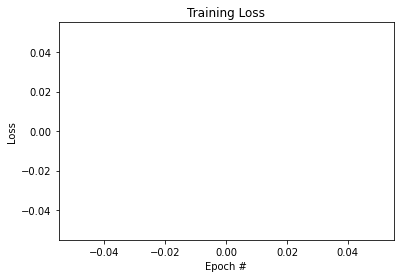

In [4]:
# vamos a probar con un learning rate ENORME
learning_rate = 2
n_epochs = 10
batch_size = 128
train_network(learning_rate, batch_size, n_epochs)

En este caso, incluso escogiendo un learning rate que debería hacerlo explotar todo, la red puede llegar a converger. Esto se debe a que es un problema muy sencillo, pero no pasaría igual si estuvieramos trabajando con otro problema más real, como comprobaréis en la próxima sesión.

Pero como os digo, está al limite: si lo reejecutáis, os dará valores distintos, siendo lo más normal que no logre converger (aparecería `nan` como salida). Esta variabilidad se debe a que el cargador de datos aleatoriza las imágenes en cada ejecución, y el orden en que la red ve las imágenes le hace converger o no.

Veamos qué ocurre cuando disminuímos el learning rate:

[0] cost: 0.5909967699667786
[1] cost: 0.38136091890868606
[2] cost: 0.3477910415275948
[3] cost: 0.3311450101417817
[4] cost: 0.321579943204815
[5] cost: 0.31200004982086865
[6] cost: 0.30478862931817313
[7] cost: 0.30229209524976636
[8] cost: 0.2972588774624406
[9] cost: 0.29329991232959784
Entrenamiento finalizado!!
Accuracy: 0.9219


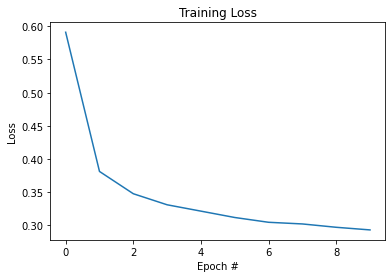

In [5]:
# vamos a probar con 0.1
learning_rate = 0.1
n_epochs = 10
batch_size = 128
train_network(learning_rate, batch_size, n_epochs)

[0] cost: 2.3002708041584587
[1] cost: 2.2956617990018042
[2] cost: 2.291040497226314
[3] cost: 2.28646174288574
[4] cost: 2.281891705550792
[5] cost: 2.27734959709061
[6] cost: 2.272816073366534
[7] cost: 2.268314087029658
[8] cost: 2.2637509249307066
[9] cost: 2.259383390555571
Entrenamiento finalizado!!
Accuracy: 0.686


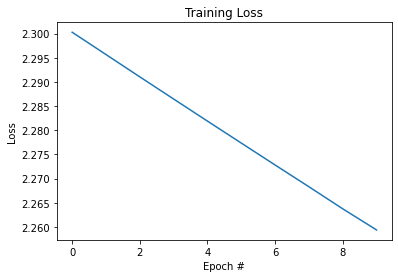

In [6]:
# y ahora con uno muy pequeño
learning_rate = 0.00001
n_epochs = 10
batch_size = 128
train_network(learning_rate, batch_size, n_epochs)

Como podéis comprobar, en este caso las pérdidas van disminuyendo paulatinamente, pero tan despacio, que podría llevarnos horas conseguir la solución que hemos alcanzado con un learning rate adecuado en solo 10 épocas.

Vamos a ejecutar ahora esto mismo, pero con 10.000 épocas, a ver qué pasa. Para ello, tenemos un notebook auxiliar, porque si no nos quedaríamos aquí hasta mañana esperando. Vamos a probar si a Google Colab le gusta que tengamos dos notebooks a la vez ejecutándose, que ya sabemos que es un poco caprichoso. El notebook se llama "3. Ejemplo 10.000 épocas NN".


Bueno, pues la mejor ejecución la hemos conseguido con learning rate = 0.1. Pero... ¿se puede mejorar?

Como podréis imaginaros, el learning rate es un parámetro muy importante. Ya hemos visto antes que si ponemos un learning rate muy alto, podemos saltarnos el mínimo. En cambio, si ponemos un learning rate muy bajo, igual nos morimos de viejos antes de ver el resultado. ¿Cómo podemos arreglar esto? Pues una forma sería dar pasos más grandes al principio, y conforme nos aproximamos a la meta, empezar a disminuir su longitud para no pasárnosla, no os parece?

Pues esto mismo se llama learning rate *decay*. ¿Qué os parece si lo implementamos en nuestro ejemplo?

Vamos allá!

In [0]:
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_network_decay(learning_rate, lr_decay, batch_size, n_epochs):
  
  # creamos los contenedores para nuestras entradas y salidas
  x = tf.placeholder(tf.float32, [None, 784]) # imágenes del mnist: 28*28=784
  y = tf.placeholder(tf.float32, [None, 10]) # número indicando la clase 0-9 => 10 clases
  
  # y creamos las variables W y b para el entrenamiento
  W = tf.Variable(tf.zeros([784, 10]))
  b = tf.Variable(tf.zeros([10]))

  # por último, construimos el modelo
  pred = tf.nn.softmax(tf.matmul(x, W) + b)

  # ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
  # no os preocupéis, la veremos en detalle en la próxima sesión
  # a veces la llaman loss, a veces cost => es lo mismo
  cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

  # calculamos los gradientes (gradient descent)
  grad_W, grad_b = tf.gradients(xs=[W, b], ys=cost)
  
  # definimos las operaciones para actualizar los pesos con los gradientes calculados
  # e implementamos el learning rate decay
  new_W = W.assign(W - learning_rate * (1-lr_decay) * grad_W)
  new_b = b.assign(b - learning_rate * (1-lr_decay) * grad_b)

  # inicializamos las variables
  init = tf.global_variables_initializer()
  
  # para almacenar el histórico de costes
  costs = []
  # inicializamos current_lr
  current_lr = learning_rate
  # empezamos la sesión
  with tf.Session() as sess:
      sess.run(init)

      # entrenamiento de nuestra red
      for epoch in range(n_epochs):
          avg_cost = 0.
          total_batch = int(mnist.train.num_examples/batch_size)

          # y si en vez de actualizar los pesos para cada imagen, lo hacemos
          # de X en X imágenes?
          for i in range(total_batch):
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)

              # ejecutamos la optimización
              Wc, bc, c = sess.run([new_W, new_b ,cost], feed_dict={x: batch_xs,
                                                                    y: batch_ys})

              # calculamos el coste teniendo en cuenta los batches que hay
              avg_cost += c / total_batch
              
          # actualizamos el learning_rate igual que lo hace tensorflow
          current_lr = current_lr * (1-lr_decay)

          # guardamos nuestro coste en el histórico
          costs.append(avg_cost)
          
          # Imprimimos las iteraciones
          # current_lr = learning_rate * (1-lr_decay) ** (epoch * batch_size + i)
          print("[{}] cost: {} lr: {}".format(epoch, avg_cost, current_lr))

      print("Entrenamiento finalizado!!")

      # comprobamos lo que ha aprendido nuestra red
      correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

      # calculamos el accuracy (precisión)
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
      print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
      
  # veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
  plt.plot(np.arange(0, n_epochs), costs)
  plt.title("Training Loss")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")

[0] cost: 0.4903690877146932 lr: 0.19998000000000002
[1] cost: 0.3415928004365979 lr: 0.19996000200000003
[2] cost: 0.31890298096172187 lr: 0.19994000599980002
[3] cost: 0.30687644966554545 lr: 0.19992001199920004
[4] cost: 0.2989231867320611 lr: 0.1999000199980001
[5] cost: 0.2930048587091596 lr: 0.19988002999600032
[6] cost: 0.2884952545443896 lr: 0.19986004199300073
[7] cost: 0.28277840666768156 lr: 0.19984005598880142
[8] cost: 0.2823983054512586 lr: 0.19982007198320254
[9] cost: 0.2755278913186982 lr: 0.1998000899760042
Entrenamiento finalizado!!
Accuracy: 0.9238


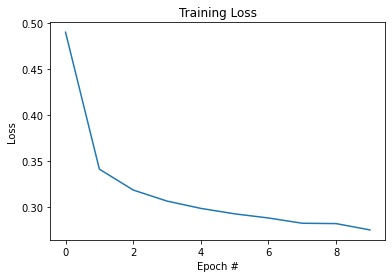

In [11]:
# vamos a probar nuestra red con decay
learning_rate = 0.2
lr_decay = 1e-4
n_epochs = 10
batch_size = 128
train_network_decay(learning_rate, lr_decay, batch_size, n_epochs)

Fijaos que con esta simple mejora, hemos sido capaces de mejorar la precisión un poco con respecto al learning rate óptimo, que habíamos definido como 0.1. Y existen métodos más complejos de aplicar el *decay* que producen mejores resultados.

**Así que ya sabéis, mucha atención al learning rate!!**

**IMPORTANTE**: Cabe decir que esta implementación de learning rate *decay* es muy básic. En realidad existen distintos tipos de "calendarios" de actualización de learning rate: de escalón, polinomial, etc. Al final, lo que hacen todos es modificar el learning rate de acuerdo a una ecuación o regla.


### 3.2.2 Batch size

Vamos a ver ahora qué es el **batch size**. ¿Recordáis cuando hemos hablado antes del SGD y el Mini-batch SGD? 

Recordad que el SGD es un Mini-bacth SGD donde $k=1$.

Y que en el Mini-bacth SGD la $k$ indica el número de muestras que se utilizan para actualizar los pesos cada vez. Realmente, este no es un parámetro crítico y se suele establecer como el **número máximo de muestras potencia de 2 que caben en nuestra GPU**.

Ejemplos:

* Tenemos una GPU con 8GB de memoria, cuantas muestras nos caben si cada imagen ocupa 1MB?

Bueno, pues no es tan fácil! Resulta que depende de la arquitectura de la red. Las capas *Densas* o *Fully Connected*, que son las tradicionales en las que todas las neuronas se interconectan con todas las neuronas de la siguiente capa, son las que **más parametros tienen**, y por consiguiente, las que **más memoria ocupan**.

Luego tambien tenemos capas convolucionales, de pooling, de dropout, y de muchos otros tipos. Así que en la práctica, es difícil calcular a mano cual es el número máximo de muestras que podemos usar.

Lo que se hace es probar con tamaños de batch potencia de 2 e ir disminuyéndolo si tenemos un error de memoria. Por ejemplo, podríamos empezar con 512, y si nos da error ir bajando a 256, 128, 64, 32, 16, 8, 4, 2 e incluso 1. Dependiendo de la arquitectura de nuestra red, puede llegar a pasarnos que tengamos que usar $k=1$, y por tanto, SGD.

Aunque muchas veces es preferible disminuir el tamaño de la imagen, por ejemplo, de 512x512 a 256x256 o 128x128 pixels, y usar un $k$ mayor.

Yo por ejemplo he tenido que usar $k=1$ con imágenes de 512x512 y la arquitectura DenseNet. **Y no hay problema**, simplemente tarda **más tiempo** en llegar a una solución adecuada.

Vamos a ver algunos casos de diferentes bath size siguiendo con el ejemplo anterior:

[0] cost: 0.9809661874404323 lr: 0.999
[1] cost: 0.42941223887296825 lr: 0.998001
[2] cost: 0.37770203214425313 lr: 0.997002999
[3] cost: 0.35615860613492817 lr: 0.996005996001
[4] cost: 0.3408370705751272 lr: 0.995009990004999
[5] cost: 0.3334643989801407 lr: 0.994014980014994
[6] cost: 0.3251530424906657 lr: 0.993020965034979
[7] cost: 0.3183446847475492 lr: 0.9920279440699441
[8] cost: 0.31501872379046225 lr: 0.9910359161258742
[9] cost: 0.30926636893015647 lr: 0.9900448802097482
Entrenamiento finalizado!!
Accuracy: 0.9198


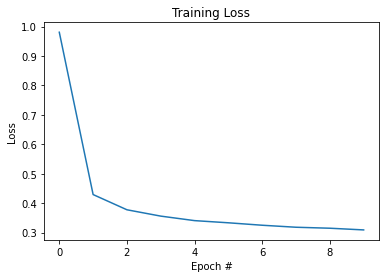

In [12]:
# con batch_size = 2048
learning_rate = 1.
lr_decay = 1e-3
n_epochs = 10
batch_size = 2048
train_network_decay(learning_rate, lr_decay, batch_size, n_epochs)

[0] cost: 0.4736234008848111 lr: 0.999
[1] cost: 0.32334467504069064 lr: 0.998001
[2] cost: 0.3011613172766205 lr: 0.997002999
[3] cost: 0.2870512790629798 lr: 0.996005996001
[4] cost: 0.28429841702786557 lr: 0.995009990004999
[5] cost: 0.2814742534934919 lr: 0.994014980014994
[6] cost: 0.2766284517177912 lr: 0.993020965034979
[7] cost: 0.27621854876524937 lr: 0.9920279440699441
[8] cost: 0.2708807605031493 lr: 0.9910359161258742
[9] cost: 0.2708132037910345 lr: 0.9900448802097482
Entrenamiento finalizado!!
Accuracy: 0.9243


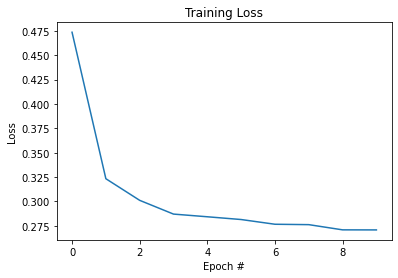

In [13]:
# con batch_size = 256
learning_rate = 1.
lr_decay = 1e-3
n_epochs = 10
batch_size = 256
train_network_decay(learning_rate, lr_decay, batch_size, n_epochs)

[0] cost: 0.49103039859743036 lr: 0.999
[1] cost: 0.4027690537711897 lr: 0.998001
[2] cost: 0.40255291048736597 lr: 0.997002999
[3] cost: 0.37884002535390315 lr: 0.996005996001
[4] cost: 0.3886457482955661 lr: 0.995009990004999
[5] cost: 0.3889310054190465 lr: 0.994014980014994
[6] cost: nan lr: 0.993020965034979
[7] cost: nan lr: 0.9920279440699441
[8] cost: nan lr: 0.9910359161258742
[9] cost: nan lr: 0.9900448802097482
Entrenamiento finalizado!!
Accuracy: 0.098


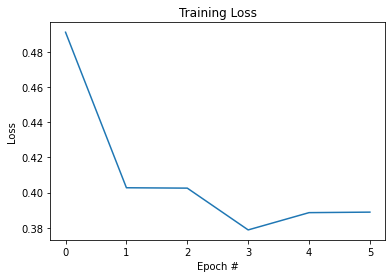

In [14]:
# con batch_size = 32
learning_rate = 1.
lr_decay = 1e-3
n_epochs = 10
batch_size = 32
train_network_decay(learning_rate, lr_decay, batch_size, n_epochs)

In [0]:
# recordad la montaña, estamos saltando de arriba a abajo y de abajo a arriba, en vez de ir siempre hacia abajo...

### Vaya!! Qué es lo que ha pasado?

Es muy importante tener en cuenta que el **learning rate va relacionado con el batch size**.

Si nos aproximamos a $k=1$, debemos bajar el learning rate para que las actualizaciones de los pesos tengan menos importancia, ya que cada vez se aproxima más al SGD, es decir, a cálculos del gradiente con muestras aleatorias. 

Veamos qué pasa si disminuimos el learning rate:

[0] cost: 0.42164708537779183 lr: 0.0999
[1] cost: 0.3180797323280985 lr: 0.0998001
[2] cost: 0.2993746457320047 lr: 0.0997002999
[3] cost: 0.2902060885316276 lr: 0.0996005996001
[4] cost: 0.2839294792314487 lr: 0.0995009990004999
[5] cost: 0.27907656427858796 lr: 0.0994014980014994
[6] cost: 0.2776565871063766 lr: 0.0993020965034979
[7] cost: 0.27628493391419734 lr: 0.09920279440699441
[8] cost: 0.26912494371314494 lr: 0.09910359161258742
[9] cost: 0.2701870565746105 lr: 0.09900448802097483
Entrenamiento finalizado!!
Accuracy: 0.9217


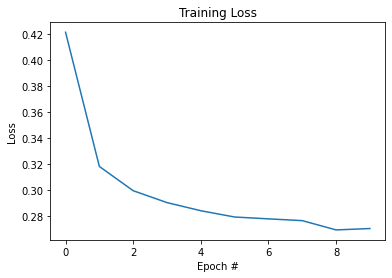

In [16]:
# con batch_size = 32 y learning rate = 0.1
learning_rate = 0.1
lr_decay = 1e-3
n_epochs = 10
batch_size = 32
train_network_decay(learning_rate, lr_decay, batch_size, n_epochs)

Y si os fijáis en la curva de pérdidas, podéis intuir que todavía es demasiado grande, puesto que la función no es monótona decreciente, es decir, que no disminuye en cada época. Así que sería mejor usar un learning rate aun menor. Veámoslo:

[0] cost: 0.7905179016266056 lr: 0.00999
[1] cost: 0.4630600413929879 lr: 0.009980010000000001
[2] cost: 0.4125728102984193 lr: 0.00997002999
[3] cost: 0.38501321430273616 lr: 0.00996005996001
[4] cost: 0.3648823295764379 lr: 0.00995009990004999
[5] cost: 0.3530901722714086 lr: 0.00994014980014994
[6] cost: 0.34497313654186845 lr: 0.00993020965034979
[7] cost: 0.33648234748469114 lr: 0.009920279440699441
[8] cost: 0.33186262632623675 lr: 0.009910359161258741
[9] cost: 0.3231285819144128 lr: 0.009900448802097483
Entrenamiento finalizado!!
Accuracy: 0.9166


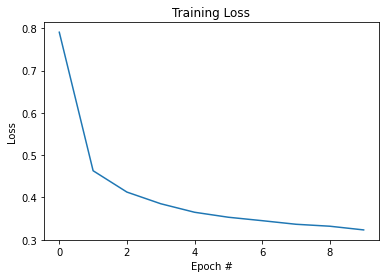

In [17]:
# con batch_size = 32 y learning_rate=0.01
learning_rate = 0.01
lr_decay = 1e-3
n_epochs = 10
batch_size = 32
train_network_decay(learning_rate, lr_decay, batch_size, n_epochs)

Fijáos como el Accuracy es menor con el learning rate más bajo. ¿Esto por qué? Acordaos! Necesitamos más épocas, ya que los pesos se actualizan más lentamente :)

### ¿Os dáis cuenta? Como deberes os dejo que hagáis pruebas variando estos parámetros ;-)

## 3.3 Funciones de pérdidas y funciones de activación

### 3.3.1 Funciones de pérdidas

¿Qué es una función de pérdidas (o de coste)? ¿Quién sabe decírmelo?

La función de pérdidas es la que nos indica en cuánto nos hemos equivocado con nuestras predicciones.

Imaginad que tenemos que adivinar cuánto cuesta una casa simplemente viendo una foto. Nuestra red tendría como entrada los píxels de la foto, y como salida un número indicando el precio.

Por ejemplo, digamos que queremos predecir el precio de esta casa:

<img src="https://cdn.elgrupoinformatico.com/img/w720/Noticias/2018/05/memes-chalet-pablo-iglesias-irene-montero-720x362.jpg" border="0">

Imaginaos que estamos entrenando la red y que esta casa está dentro de nuestro conjunto de training. Cuando la imagen pasa hacia delante, se calcula una predicción, que es que vale 323.567€. La verdad es que la casa cuesta 600.000€, así que parece obvio que una función de pérdidas adecuada podría ser:

$f_{loss} = prediccion - valor\_real$

¿Lo entendéis verdad? Es exactamente lo mismo que con un SVM o la regresión lineal, por ejemplo.

Bueno, pues para no enrollarme mucho, estas son las funciones de pérdidas más comunes:

* **Problemas de regresión**
 * Mean Squared Error
 * Mean Absolute Error
* **Problemas de clasificación**
 * Binary Cross-Entropy
 * Categorical Cross-Entropy

Veamos qué son cada una:

* Mean Squared Error

$$MSE = \frac{1}{n} \sum^{n}_{i=1} (y_i-x_i)^2$$

* Mean Absolute Error

$$MAE = \frac{1}{n} \sum^{n}_{i=1} |y_i-x_i|$$

Hasta aquí todo bien verdad? Pero.. qué es la entropía cruzada o cross-entropy?

Vamos a verla en este ejemplo a parte:

https://colab.research.google.com/drive/1FLM26U7Co5DwqCpyVyxFgQJfax94cEnE?authuser=2

Bueno, pues ahora que está claro qué son las funciones de pérdidas, vamos a por las de activación!

### 3.3.2 Funciones de activación

Os he de confesar una cosa: la magia de las redes neuronales no es solo el back-propagation. Sin las funciones de activación, las redes neuronales no funcionarían. ¿Alguien sabe decirme por qué?

..


..


..

Os doy una pista:

### Qué pasaría si no existiese la función de activación?

<img src="https://image.ibb.co/ftYCVo/what_if_no_activation_function.png" alt="what_if_no_activation_function" border="0">

Tendríamos que $y(x)= Wx + b$. Esto es una combinación lineal que sería incapaz incluso de resolver un problema como el XOR.

<img src="https://image.ibb.co/kg9GO8/xor.gif" alt="xor" border="0">

Por lo tanto, necesitamos una forma de introducir **no linealidades**, y de eso es de lo que se encarga la **función de activación**. En la siguiente imagen podéis ver algunas de las más típicas, y donde interviene en la red:

<img src="https://image.ibb.co/bVS6qo/perceptron_activation.png" alt="perceptron_activation" border="0" width="600">

Aquí podéis ver las más usadas:

<img src="https://image.ibb.co/gMG5kd/activation_functions.png" alt="activation_functions" border="0" width="600">

Es difícil saber con cual de ellas nuestra red se va a comportar mejor, pero existe una que suele dar buenos resultados casi siempre: la **ReLU**. Por lo tanto, siempre que empecemos, emplearemos la ReLU, y una vez consigamos unos resultados que consideremos buenos, podemos probar con la Leaky ReLU, o cualquier otra que os apetezca. Cada día salen nuevas, y una simple búsqueda en google os puede llevar a alguna interesante: como la SELU, por ejemplo (https://towardsdatascience.com/selu-make-fnns-great-again-snn-8d61526802a9).

Muchas de estas funciones de activación necesitan métodos específicos de **inicialización de pesos**, para que esten dentro de unos valores y que el descenso del gradiente funcione adecuadamente.

Veamos qué es lo que pasa si empleamos diferentes funciones de activación con nuestra ya conocida red:

In [18]:
# ejemplos de funciones de activación

# para ello, priemro hacemos los imports necesarios y después definimos una 
# función que creará y entrenará la red, teniendo como entrada la función de
# activación que queremos usar

# imports necesarios
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# importamos el dataset MNIST y cargamos los datos
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_network_decay_fnact(activation_function, learning_rate, lr_decay, batch_size, n_epochs):
  
  # creamos los contenedores para nuestras entradas y salidas
  x = tf.placeholder(tf.float32, [None, 784]) # imágenes del mnist: 28*28=784
  y = tf.placeholder(tf.float32, [None, 10]) # número indicando la clase 0-9 => 10 clases
  
  # y creamos las variables W y b para el entrenamiento
  W = tf.Variable(tf.zeros([784, 10]))
  b = tf.Variable(tf.zeros([10]))

  # por último, construimos el modelo
  pred = activation_function(tf.matmul(x, W) + b)

  # ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
  # no os preocupéis, la veremos en detalle en la próxima sesión
  # a veces la llaman loss, a veces cost => es lo mismo
  cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

  # calculamos los gradientes (gradient descent)
  grad_W, grad_b = tf.gradients(xs=[W, b], ys=cost)
  
  # definimos las operaciones para actualizar los pesos con los gradientes calculados
  # e implementamos el learning rate decay
  new_W = W.assign(W - learning_rate * (1-lr_decay) * grad_W)
  new_b = b.assign(b - learning_rate * (1-lr_decay) * grad_b)

  # inicializamos las variables
  init = tf.global_variables_initializer()
  
  # para almacenar el histórico de costes
  costs = []
  # inicializamos current_lr
  current_lr = learning_rate
  # empezamos la sesión
  with tf.Session() as sess:
      sess.run(init)

      # entrenamiento de nuestra red
      for epoch in range(n_epochs):
          avg_cost = 0.
          total_batch = int(mnist.train.num_examples/batch_size)

          # y si en vez de actualizar los pesos para cada imagen, lo hacemos
          # de X en X imágenes?
          for i in range(total_batch):
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)

              # ejecutamos la optimización
              Wc, bc, c = sess.run([new_W, new_b ,cost], feed_dict={x: batch_xs,
                                                                    y: batch_ys})

              # calculamos el coste teniendo en cuenta los batches que hay
              avg_cost += c / total_batch
              
          # actualizamos el learning_rate igual que lo hace tensorflow
          current_lr = current_lr * (1-lr_decay)

          # guardamos nuestro coste en el histórico
          costs.append(avg_cost)
          
          # Imprimimos las iteraciones
          # current_lr = learning_rate * (1-lr_decay) ** (epoch * batch_size + i)
          print("[{}] cost: {} lr: {}".format(epoch, avg_cost, current_lr))

      print("Entrenamiento finalizado!!")

      # comprobamos lo que ha aprendido nuestra red
      correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

      # calculamos el accuracy (precisión)
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
      print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
      
  # veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
  plt.plot(np.arange(0, n_epochs), costs)
  plt.title("Training Loss")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")

# Vamos a probar con la Sigmoide

<img src="https://image.ibb.co/cMMqJ8/act_fn_sigmoid.png" alt="act_fn_sigmoid" border="0" height="250">

[0] cost: 0.03613612315637044 lr: 0.0999
[1] cost: 0.006143541028071844 lr: 0.0998001
[2] cost: 0.0038131086578015163 lr: 0.0997002999
[3] cost: 0.0028054684328375525 lr: 0.0996005996001
[4] cost: 0.0022318459328672133 lr: 0.0995009990004999
[5] cost: 0.001871975824249896 lr: 0.0994014980014994
[6] cost: 0.0016054004276907258 lr: 0.0993020965034979
[7] cost: 0.0014098625009258598 lr: 0.09920279440699441
[8] cost: 0.001265944427151736 lr: 0.09910359161258742
[9] cost: 0.001140994936339601 lr: 0.09900448802097483
Entrenamiento finalizado!!
Accuracy: 0.6705


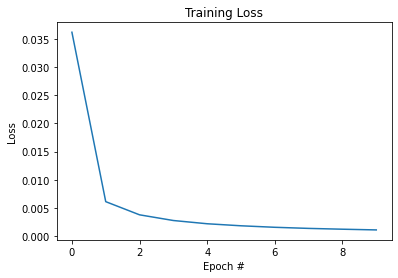

In [21]:
# probamos la sigmoid
activation_function = tf.nn.sigmoid
learning_rate = 0.1
lr_decay = 1e-3
n_epochs = 10
batch_size = 128
train_network_decay_fnact(activation_function, learning_rate, lr_decay, batch_size, n_epochs)

# Veamos con la tanh

<img src="https://image.ibb.co/haCKBT/act_fn_tanh.png" alt="act_fn_tanh" border="0" height="250">

[0] cost: nan lr: 0.0999
[1] cost: nan lr: 0.0998001
[2] cost: nan lr: 0.0997002999
[3] cost: nan lr: 0.0996005996001
[4] cost: nan lr: 0.0995009990004999
[5] cost: nan lr: 0.0994014980014994
[6] cost: nan lr: 0.0993020965034979
[7] cost: nan lr: 0.09920279440699441
[8] cost: nan lr: 0.09910359161258742
[9] cost: nan lr: 0.09900448802097483
Entrenamiento finalizado!!
Accuracy: 0.098


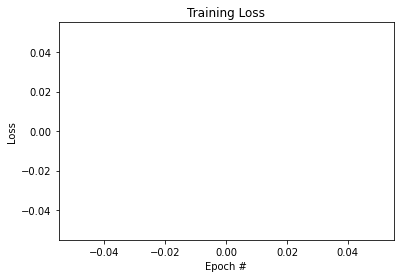

In [22]:
# probamos la tanh
activation_function = tf.nn.tanh
learning_rate = 0.1
lr_decay = 1e-3
n_epochs = 10
batch_size = 128
train_network_decay_fnact(activation_function, learning_rate, lr_decay, batch_size, n_epochs)

### ¡Vaya! ¿Qué está pasando?

Probemos a cambiar la inicialización de la bias, en vez de a 0s, a 1s.

In [0]:
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_network_decay_fnact_b1(activation_function, learning_rate, lr_decay, batch_size, n_epochs):
  
  # creamos los contenedores para nuestras entradas y salidas
  x = tf.placeholder(tf.float32, [None, 784]) # imágenes del mnist: 28*28=784
  y = tf.placeholder(tf.float32, [None, 10]) # número indicando la clase 0-9 => 10 clases
  
  # y creamos las variables W y b para el entrenamiento
  W = tf.Variable(tf.zeros([784, 10]))
  b = tf.Variable(tf.ones([10]))

  # por último, construimos el modelo
  pred = activation_function(tf.matmul(x, W) + b)

  # ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
  # no os preocupéis, la veremos en detalle en la próxima sesión
  # a veces la llaman loss, a veces cost => es lo mismo
  cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

  # calculamos los gradientes (gradient descent)
  grad_W, grad_b = tf.gradients(xs=[W, b], ys=cost)
  
  # definimos las operaciones para actualizar los pesos con los gradientes calculados
  # e implementamos el learning rate decay
  new_W = W.assign(W - learning_rate * (1-lr_decay) * grad_W)
  new_b = b.assign(b - learning_rate * (1-lr_decay) * grad_b)

  # inicializamos las variables
  init = tf.global_variables_initializer()
  
  # para almacenar el histórico de costes
  costs = []
  # inicializamos current_lr
  current_lr = learning_rate
  # empezamos la sesión
  with tf.Session() as sess:
      sess.run(init)

      # entrenamiento de nuestra red
      for epoch in range(n_epochs):
          avg_cost = 0.
          total_batch = int(mnist.train.num_examples/batch_size)

          # y si en vez de actualizar los pesos para cada imagen, lo hacemos
          # de X en X imágenes?
          for i in range(total_batch):
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)

              # ejecutamos la optimización
              Wc, bc, c = sess.run([new_W, new_b ,cost], feed_dict={x: batch_xs,
                                                                    y: batch_ys})

              # calculamos el coste teniendo en cuenta los batches que hay
              avg_cost += c / total_batch
              
              # actualizamos el learning_rate igual que lo hace tensorflow
              current_lr = current_lr * (1-lr_decay)

          # guardamos nuestro coste en el histórico
          costs.append(avg_cost)
          
          # Imprimimos las iteraciones
          # current_lr = learning_rate * (1-lr_decay) ** (epoch * batch_size + i)
          print("[{}] cost: {} lr: {}".format(epoch, avg_cost, current_lr))

      print("Entrenamiento finalizado!!")

      # comprobamos lo que ha aprendido nuestra red
      correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

      # calculamos el accuracy (precisión)
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
      print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
      
  # veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
  plt.plot(np.arange(0, n_epochs), costs)
  plt.title("Training Loss")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")

[0] cost: 0.008607449590462947 lr: 0.06510201771893982
[1] cost: 0.0015046053062929034 lr: 0.04238272711077151
[2] cost: 0.0009448280053795052 lr: 0.02759201051342441
[3] cost: 0.000697504240373097 lr: 0.017962955573461316
[4] cost: 0.0005533601562242894 lr: 0.011694246520280062
[5] cost: 0.0004660144618832847 lr: 0.007613190441729219
[6] cost: 0.000399490859357332 lr: 0.004956340590351182
[7] cost: 0.00035307134551431404 lr: 0.003226677729341426
[8] cost: 0.00031454832165416305 lr: 0.0021006323070889344
[9] cost: 0.00028564449004060433 lr: 0.001367554016770813
Entrenamiento finalizado!!
Accuracy: 0.6698


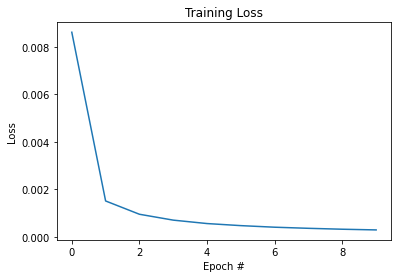

In [24]:
# probamos la tanh y bias 1 en vez de 0
activation_function = tf.nn.tanh
learning_rate = 0.1
lr_decay = 1e-3
n_epochs = 10
batch_size = 128
train_network_decay_fnact_b1(activation_function, learning_rate, lr_decay, batch_size, n_epochs)

### Parece que hemos conseguido mejorarlo!!

**Ahora, por lo menos, nuestra red se entrena... pero no se comporta todo lo bien que esperábamos, verdad?**

Vamos a probar a cambiar la función de pérdidas, de la cros-entropía al error cuadrático medio:

In [0]:
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_network_decay_fnact_b1_mse(activation_function, learning_rate, lr_decay, batch_size, n_epochs):
  
  # creamos los contenedores para nuestras entradas y salidas
  x = tf.placeholder(tf.float32, [None, 784]) # imágenes del mnist: 28*28=784
  y = tf.placeholder(tf.float32, [None, 10]) # número indicando la clase 0-9 => 10 clases
  
  # y creamos las variables W y b para el entrenamiento
  W = tf.Variable(tf.zeros([784, 10]))
  b = tf.Variable(tf.ones([10]))

  # por último, construimos el modelo
  pred = activation_function(tf.matmul(x, W) + b)

  # ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
  # no os preocupéis, la veremos en detalle en la próxima sesión
  # a veces la llaman loss, a veces cost => es lo mismo
  # cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
  cost = tf.reduce_mean(tf.squared_difference(pred, y))

  # calculamos los gradientes (gradient descent)
  grad_W, grad_b = tf.gradients(xs=[W, b], ys=cost)
  
  # definimos las operaciones para actualizar los pesos con los gradientes calculados
  # e implementamos el learning rate decay
  new_W = W.assign(W - learning_rate * (1-lr_decay) * grad_W)
  new_b = b.assign(b - learning_rate * (1-lr_decay) * grad_b)

  # inicializamos las variables
  init = tf.global_variables_initializer()
  
  # para almacenar el histórico de costes
  costs = []
  # inicializamos current_lr
  current_lr = learning_rate
  # empezamos la sesión
  with tf.Session() as sess:
      sess.run(init)

      # entrenamiento de nuestra red
      for epoch in range(n_epochs):
          avg_cost = 0.
          total_batch = int(mnist.train.num_examples/batch_size)

          # y si en vez de actualizar los pesos para cada imagen, lo hacemos
          # de X en X imágenes?
          for i in range(total_batch):
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)

              # ejecutamos la optimización
              Wc, bc, c = sess.run([new_W, new_b ,cost], feed_dict={x: batch_xs,
                                                                    y: batch_ys})

              # calculamos el coste teniendo en cuenta los batches que hay
              avg_cost += c / total_batch
              
          # actualizamos el learning_rate igual que lo hace tensorflow
          current_lr = current_lr * (1-lr_decay)

          # guardamos nuestro coste en el histórico
          costs.append(avg_cost)
          
          # Imprimimos las iteraciones
          # current_lr = learning_rate * (1-lr_decay) ** (epoch * batch_size + i)
          print("[{}] cost: {} lr: {}".format(epoch, avg_cost, current_lr))

      print("Entrenamiento finalizado!!")

      # comprobamos lo que ha aprendido nuestra red
      correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

      # calculamos el accuracy (precisión)
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
      print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
      
  # veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
  plt.plot(np.arange(0, n_epochs), costs)
  plt.title("Training Loss")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")

[0] cost: 0.07838331333129271 lr: 0.0999
[1] cost: 0.056300459876830265 lr: 0.0998001
[2] cost: 0.04908392807612051 lr: 0.0997002999
[3] cost: 0.04571573170540215 lr: 0.0996005996001
[4] cost: 0.04431915201576719 lr: 0.0995009990004999
[5] cost: 0.0434570159580741 lr: 0.0994014980014994
[6] cost: 0.04306625371629542 lr: 0.0993020965034979
[7] cost: 0.042781398360267966 lr: 0.09920279440699441
[8] cost: 0.04261634539647811 lr: 0.09910359161258742
[9] cost: 0.04248487542976031 lr: 0.09900448802097483
Entrenamiento finalizado!!
Accuracy: 0.8551


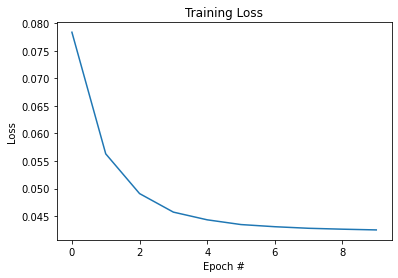

In [26]:
# probamos la tanh, bias = 1 y loss_fn = mse
activation_function = tf.nn.tanh
learning_rate = 0.1
lr_decay = 1e-3
n_epochs = 10
batch_size = 128
train_network_decay_fnact_b1_mse(activation_function, learning_rate, lr_decay, batch_size, n_epochs)

¿Os dáis cuenta? Hay 3 cosas que van íntimamente ligadas y de las que debemos ocuparnos para encontrar una buena configuración:

* **La función de activación**
* **La función de pérdidas**
* **La inicialización de los pesos y bias**

### Vamos a probar que pasaría si también inicializásemos los pesos con unos en vez de con ceros: 

In [0]:
# cambiamos la inicialización de los pesos a 1s en vez de 0s
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_network_decay_fnact_w1_b1_mse(activation_function, learning_rate, lr_decay, batch_size, n_epochs):
  
  # creamos los contenedores para nuestras entradas y salidas
  x = tf.placeholder(tf.float32, [None, 784]) # imágenes del mnist: 28*28=784
  y = tf.placeholder(tf.float32, [None, 10]) # número indicando la clase 0-9 => 10 clases
  
  # y creamos las variables W y b para el entrenamiento
  W = tf.Variable(tf.ones([784, 10]))
  b = tf.Variable(tf.ones([10]))

  # por último, construimos el modelo
  pred = activation_function(tf.matmul(x, W) + b)

  # ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
  # no os preocupéis, la veremos en detalle en la próxima sesión
  # a veces la llaman loss, a veces cost => es lo mismo
  # cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
  cost = tf.reduce_mean(tf.squared_difference(pred, y))

  # calculamos los gradientes (gradient descent)
  grad_W, grad_b = tf.gradients(xs=[W, b], ys=cost)
  
  # definimos las operaciones para actualizar los pesos con los gradientes calculados
  # e implementamos el learning rate decay
  new_W = W.assign(W - learning_rate * (1-lr_decay) * grad_W)
  new_b = b.assign(b - learning_rate * (1-lr_decay) * grad_b)

  # inicializamos las variables
  init = tf.global_variables_initializer()
  
  # para almacenar el histórico de costes
  costs = []
  # inicializamos current_lr
  current_lr = learning_rate
  # empezamos la sesión
  with tf.Session() as sess:
      sess.run(init)

      # entrenamiento de nuestra red
      for epoch in range(n_epochs):
          avg_cost = 0.
          total_batch = int(mnist.train.num_examples/batch_size)

          # y si en vez de actualizar los pesos para cada imagen, lo hacemos
          # de X en X imágenes?
          for i in range(total_batch):
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)

              # ejecutamos la optimización
              Wc, bc, c = sess.run([new_W, new_b ,cost], feed_dict={x: batch_xs,
                                                                    y: batch_ys})

              # calculamos el coste teniendo en cuenta los batches que hay
              avg_cost += c / total_batch
              
          # actualizamos el learning_rate igual que lo hace tensorflow
          current_lr = current_lr * (1-lr_decay)

          # guardamos nuestro coste en el histórico
          costs.append(avg_cost)
          
          # Imprimimos las iteraciones
          # current_lr = learning_rate * (1-lr_decay) ** (epoch * batch_size + i)
          print("[{}] cost: {} lr: {}".format(epoch, avg_cost, current_lr))

      print("Entrenamiento finalizado!!")

      # comprobamos lo que ha aprendido nuestra red
      correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

      # calculamos el accuracy (precisión)
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
      print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
      
  # veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
  plt.plot(np.arange(0, n_epochs), costs)
  plt.title("Training Loss")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")

[0] cost: 0.8999999761581354 lr: 0.0999
[1] cost: 0.8999999761581354 lr: 0.0998001
[2] cost: 0.8999999761581354 lr: 0.0997002999
[3] cost: 0.8999999761581354 lr: 0.0996005996001
[4] cost: 0.8999999761581354 lr: 0.0995009990004999
[5] cost: 0.8999999761581354 lr: 0.0994014980014994
[6] cost: 0.8999999761581354 lr: 0.0993020965034979
[7] cost: 0.8999999761581354 lr: 0.09920279440699441
[8] cost: 0.8999999761581354 lr: 0.09910359161258742
[9] cost: 0.8999999761581354 lr: 0.09900448802097483
Entrenamiento finalizado!!
Accuracy: 0.098


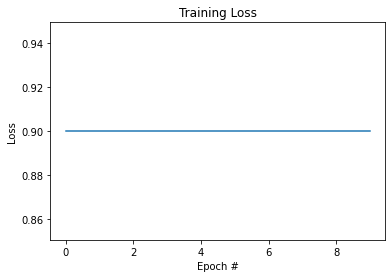

In [28]:
# probamos la tanh, weights = 1, bias = 1 y loss_fn = mse
activation_function = tf.nn.tanh
learning_rate = 0.1
lr_decay = 1e-3
n_epochs = 10
batch_size = 128
train_network_decay_fnact_w1_b1_mse(activation_function, learning_rate, lr_decay, batch_size, n_epochs)

### Y si inicializamos los pesos aleatoriamente escogiendolos de una distribución normal *truncada*?

In [0]:
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_network_decay_fnact_wNT_b1_mse(activation_function, learning_rate, lr_decay, batch_size, n_epochs):
  
  # creamos los contenedores para nuestras entradas y salidas
  x = tf.placeholder(tf.float32, [None, 784]) # imágenes del mnist: 28*28=784
  y = tf.placeholder(tf.float32, [None, 10]) # número indicando la clase 0-9 => 10 clases
  
  # y creamos las variables W y b para el entrenamiento
  W = tf.Variable(tf.truncated_normal([784, 10], mean=0.0, stddev=1.0, dtype=tf.float32, seed=42, name=None))
  b = tf.Variable(tf.ones([10]))

  # por último, construimos el modelo
  pred = activation_function(tf.matmul(x, W) + b)

  # ahora, definimos nuestra función de pérdidas: esta vez, la cros-entropía
  # no os preocupéis, la veremos en detalle en la próxima sesión
  # a veces la llaman loss, a veces cost => es lo mismo
  # cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
  cost = tf.reduce_mean(tf.squared_difference(pred, y))

  # calculamos los gradientes (gradient descent)
  grad_W, grad_b = tf.gradients(xs=[W, b], ys=cost)
  
  # definimos las operaciones para actualizar los pesos con los gradientes calculados
  # e implementamos el learning rate decay
  new_W = W.assign(W - learning_rate * (1-lr_decay) * grad_W)
  new_b = b.assign(b - learning_rate * (1-lr_decay) * grad_b)

  # inicializamos las variables
  init = tf.global_variables_initializer()
  
  # para almacenar el histórico de costes
  costs = []
  # inicializamos current_lr
  current_lr = learning_rate
  # empezamos la sesión
  with tf.Session() as sess:
      sess.run(init)

      # entrenamiento de nuestra red
      for epoch in range(n_epochs):
          avg_cost = 0.
          total_batch = int(mnist.train.num_examples/batch_size)

          # y si en vez de actualizar los pesos para cada imagen, lo hacemos
          # de X en X imágenes?
          for i in range(total_batch):
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)

              # ejecutamos la optimización
              Wc, bc, c = sess.run([new_W, new_b ,cost], feed_dict={x: batch_xs,
                                                                    y: batch_ys})

              # calculamos el coste teniendo en cuenta los batches que hay
              avg_cost += c / total_batch
              
          # actualizamos el learning_rate igual que lo hace tensorflow
          current_lr = current_lr * (1-lr_decay)

          # guardamos nuestro coste en el histórico
          costs.append(avg_cost)
          
          # Imprimimos las iteraciones
          # current_lr = learning_rate * (1-lr_decay) ** (epoch * batch_size + i)
          print("[{}] cost: {} lr: {}".format(epoch, avg_cost, current_lr))

      print("Entrenamiento finalizado!!")

      # comprobamos lo que ha aprendido nuestra red
      correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

      # calculamos el accuracy (precisión)
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
      print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
      
  # veamos nuestra función de pérdidas con respecto a las épocas ejecutadas
  plt.plot(np.arange(0, n_epochs), costs)
  plt.title("Training Loss")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")

[0] cost: 0.9985812136899063 lr: 0.0999
[1] cost: 0.9448480778362921 lr: 0.0998001
[2] cost: 0.9046823511590493 lr: 0.0997002999
[3] cost: 0.876658733074482 lr: 0.0996005996001
[4] cost: 0.8640516475364041 lr: 0.0995009990004999
[5] cost: 0.8523368189384891 lr: 0.0994014980014994
[6] cost: 0.8358579900437024 lr: 0.0993020965034979
[7] cost: 0.8189578191105857 lr: 0.09920279440699441
[8] cost: 0.8105729275094319 lr: 0.09910359161258742
[9] cost: 0.8066370449699719 lr: 0.09900448802097483
Entrenamiento finalizado!!
Accuracy: 0.1838


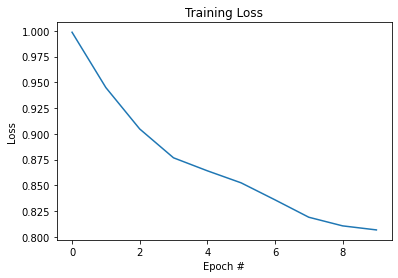

In [30]:
# probamos la tanh, weights = 1, bias = 1 y loss_fn = mse
activation_function = tf.nn.tanh
learning_rate = 0.1
lr_decay = 1e-3
n_epochs = 10
batch_size = 128
train_network_decay_fnact_wNT_b1_mse(activation_function, learning_rate, lr_decay, batch_size, n_epochs)

### Lo que pretendo con estos ejemplos es que os deis cuenta de la importancia de estos 3 parámetros. Recordad, merece la pena *perder* un poco de tiempo hasta encontrar una configuración adecuada de:

* **La función de activación**
* **La función de pérdidas**
* **La inicialización de los pesos y bias**

### También es importante que tengáis en cuenta que ahora mismo, nuestra red tiene una sola capa. Cuando tengamos redes con varias capas ocultas, hay funciones de activación que se deben utilizar en las capas ocultas y otras en las de salida. Por ejemplo, las de tipo ReLU, ELU y Maxout, son para las capas ocultas. La softmax es la que se suele emplear siempre en la salida, ya que da una distribución de probabilidades que suman 1.

Vamos a seguir con las otras funciones de activación. Usaremos la red que usa el MSE y una bias = 1.

# Veamos con la ReLU

<img src="https://image.ibb.co/mSsKBT/act_fn_relu.png" alt="act_fn_relu" border="0" height="250">

<img src="https://image.ibb.co/iUdsWT/act_fn_relu2.png" alt="act_fn_relu2" border="0" height="250">

<img src="https://image.ibb.co/fzXako/act_fn_relu3.png" alt="act_fn_relu3" border="0" height="250">

[0] cost: 0.048904583674349626 lr: 0.0999
[1] cost: 0.03353494863375364 lr: 0.0998001
[2] cost: 0.031159759462227068 lr: 0.0997002999
[3] cost: 0.029930923863516007 lr: 0.0996005996001
[4] cost: 0.028990925018326112 lr: 0.0995009990004999
[5] cost: 0.028483179968831714 lr: 0.0994014980014994
[6] cost: 0.027880319999856566 lr: 0.0993020965034979
[7] cost: 0.027376772123790583 lr: 0.09920279440699441
[8] cost: 0.027265699866872568 lr: 0.09910359161258742
[9] cost: 0.02697569243219142 lr: 0.09900448802097483
Entrenamiento finalizado!!
Accuracy: 0.8351


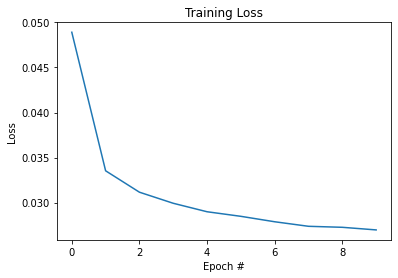

In [31]:
# probamos la ReLU
activation_function = tf.nn.relu
learning_rate = 0.1
lr_decay = 1e-3
n_epochs = 10
batch_size = 128
train_network_decay_fnact_b1_mse(activation_function, learning_rate, lr_decay, batch_size, n_epochs)

# Veamos con la Leaky RELU

<img src="https://image.ibb.co/j5pAJ8/act_fn_lrelu.png" alt="act_fn_lrelu" border="0" height="250">

[0] cost: 0.05360441170372328 lr: 0.0999
[1] cost: 0.03818855355200654 lr: 0.0998001
[2] cost: 0.03445717724504726 lr: 0.0997002999
[3] cost: 0.032228429534739554 lr: 0.0996005996001
[4] cost: 0.03057753916022244 lr: 0.0995009990004999
[5] cost: 0.02961376473516018 lr: 0.0994014980014994
[6] cost: 0.02878872549165656 lr: 0.0993020965034979
[7] cost: 0.028258110793841464 lr: 0.09920279440699441
[8] cost: 0.027951052138855414 lr: 0.09910359161258742
[9] cost: 0.02770054349914576 lr: 0.09900448802097483
Entrenamiento finalizado!!
Accuracy: 0.902


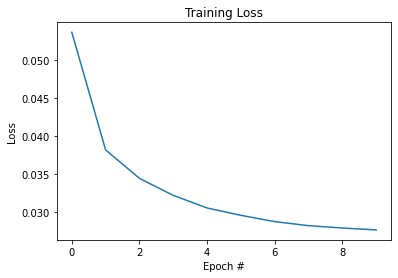

In [32]:
# probamos la Leaky ReLU, bias = 1 y loss_fn = mse
activation_function = tf.nn.leaky_relu
learning_rate = 0.1
lr_decay = 1e-3
n_epochs = 10
batch_size = 128
train_network_decay_fnact_b1_mse(activation_function, learning_rate, lr_decay, batch_size, n_epochs)

# Veamos con la ELU

<img src="https://image.ibb.co/gEJgQo/act_fn_elu.png" alt="act_fn_elu" border="0" height="250">

[0] cost: 0.07337894155220562 lr: 0.0999
[1] cost: 0.05112355907549666 lr: 0.0998001
[2] cost: 0.04438263140531969 lr: 0.0997002999
[3] cost: 0.04133664859167903 lr: 0.0996005996001
[4] cost: 0.039884909726939796 lr: 0.0995009990004999
[5] cost: 0.03929202498255911 lr: 0.0994014980014994
[6] cost: 0.03886581347747285 lr: 0.0993020965034979
[7] cost: 0.0386665364844607 lr: 0.09920279440699441
[8] cost: 0.03851215834002116 lr: 0.09910359161258742
[9] cost: 0.03835785035521556 lr: 0.09900448802097483
Entrenamiento finalizado!!
Accuracy: 0.8665


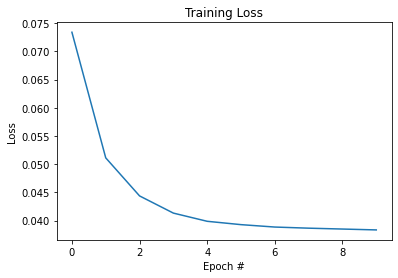

In [33]:
# probamos la ELU, bias = 1 y loss_fn = mse
activation_function = tf.nn.elu
learning_rate = 0.1
lr_decay = 1e-3
n_epochs = 10
batch_size = 128
train_network_decay_fnact_b1_mse(activation_function, learning_rate, lr_decay, batch_size, n_epochs)

# Veamos con la Maxout

<img src="https://image.ibb.co/hWg1Qo/act_fn_maxout.png" alt="act_fn_maxout" border="0" height="250">

Básicamente esta función de activación devuelve el máximo de múltiples posibles salidas para cada entrada. Al final, es una generalización de la ReLU y la Leaky ReLU. Para la ReLU, por ejemplo, tenemos $w_1=b_1=0$). Por lo tanto, la Maxout se beneficia de todas las ventajas de la ReLU (es lineal y no satura) y además evita matar el gradiente cuando $x<0$.

Para que nos entendamos, podemos aproximar cualquier función con varias maxouts, como podéis ver en la imagen siguiente, en la que aproximamos $y=x^2$ con 3 maxouts:

<img src="https://image.ibb.co/co951T/maxout_aproximator.png" alt="maxout_aproximator" border="0" height="250">

Este tipo de activación funciona bien cuando se combina con Dropout, pero no es muy utilizada en la práctica.

Si queréis saber más, aquí tenéis una presentación de Ian Goodfellow donde explican cómo funciona:  http://www.ms.uky.edu/~qye/MA721/maxout.pdf

Y aquí el paper original: https://arxiv.org/abs/1302.4389

Más info: 

 * http://cs231n.github.io/neural-networks-1/

# Atención:

### Como he comentado antes, en el caso de las capas de salida, practicamente siempre se utiliza la función de activación de tipo softmax, ya que es capaz de dar una probabilidad a cada clase, haciendo que todas ellas sumen 1. Esto en el caso de clasificación, porque en regresión, la última capa tiene tantas neuronas como valores queramos predecir y función de activación LINEAL, es decir, NINGUNA.

Como esto puede parecer un poco complicado, os voy a escribir aquí la receta que sigo yo y que hasta ahora me ha dado buenos resultados:

# Receta

* Empezar usando la ReLU con un learning rate de 0.01 o 0.001, y observar qué pasa.

* Si la red entrena (va convergiendo) pero es lenta, podéis probar a aumentar un poco el learning rate

* Si la red no converge y se compora de forma caótica, disminuid el learning rate

* Una vez tengáis la red funcionando, probad con la Leaky ReLU, la Maxout o la ELU

* En clasificación, usad la softmax. No uséis la sigmoide a menos que sepáis lo que estáis haciendo, en la práctica no suele dar buenos resultados. En regresión, recordad que la última capa NO TIENE functión de activación.


## 3.5 Inicialización de pesos

Como habéis visto antes, la inicialización de los pesos y la bias es muy importante para conseguir la convergencia de nuestra red a un mínimo adecuado. Así que vamos a ver algunas formas de inicializar los pesos.

Siguiendo con nuestro ejemplo del MNIST, nuestra matriz de pesos va a ser de 768 (entradas) x 10 (salidas).

### 3.5.1 Inicialización constante

Podemos inicializar nuestros pesos a cero:

`W = np.zeros((768, 10))`

A uno:

`W = np.ones((768, 10))`

O a una constante $C$:

`W = np.ones((768, 10)) * C`

### 3.5.2 Distribución normal y uniforme

También podemos inicializar los pesos usando una distribución **uniforme**, en la que se definen un $[upper\_bound, lower\_bound]$ y todos los números dentro del rango tienen la misma probabilidad de ser escogidos. Por ejemplo, para una distribución entre $[-0.2, 0.2]$:

`W = np.random.uniform(low=-0.2, high=0.2, size=(768, 10))`

Con esta instrucción, inicializaremos la matriz de pesos $W$ con valores extraídos del rango entre $[-0.2, 0.2]$ donde todos ellos tienen la misma probabilidad de ser extraídos.

También podemos hacerlo con una distribución **normal** o Gaussiana, la cual viene definida como:

$$p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Donde como ya sabéis:

* $\mu$ es la media
* $\sigma$ es la desviación estándar, y $\sigma^2$ la varianza

Así que podríamos inicializar nuestros pesos con una distribución normal con $\mu = 0$ y $\sigma = 0.2$, por ejemplo, de la siguiente forma:

`W = np.random.normal(0.0, 0.2, size=(768, 10))`

### 3.5.3 Inicialización: LeCun normal y uniforme

Otra forma más avanzada es el método de LeCun, también conocido como *"Efficient backprop"*.

Este método define 3 parámetros:

* $f_{in}$: número de entradas a la capa (en nuestro ejemplo, 768)
* $f_{out}$: número de salidas de la capa (en nuestro ejemplo, 10)
* $limit$: queda definido según $f_{in}$ y $f{out}$ como $limit = \sqrt{\frac{3}{f_{in}}}$

El código para inicializar $W$ mediante este método usando una distribución uniforme sería:

`W = np.random.uniform(low=-limit, high=limit, size=(F_in, F_out))`

Y para una normal:

`W = np.random.normal(low=-limit, high=limit, size=(F_in, F_out))`

### 3.5.4 Inicialización: Glorot/Xavier normal y uniforme

Esta es quizás el método más empleado a la hora de inicializar los pesos y la bias. De hecho, es el empleado por defecto cuando se utiliza Keras, un framework que veréis en la próxima sesión.

En este caso también se definen los mismos parámetros que con LeCun, pero varía el cálculo del $limit$:

 $limit = \sqrt{\frac{2}{f_{in}+f_{out}}}$
 
 El código para inicializar $W$ mediante este método sería el mismo que con LeCun. 
 
 Para una distribución uniforme sería:

`W = np.random.uniform(low=-limit, high=limit, size=(F_in, F_out))`

Y para una normal:

`W = np.random.normal(low=-limit, high=limit, size=(F_in, F_out))`

### 3.5.5 Inicialización: He et al./Kaiming/MSRA normal y uniforme

Este método debe su nombre a Kaiming He, el primer autor de *Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification*.

Normalmente, este método se usa cuando estamos entrenando redes neuronales *muy profundas* que usan un tipo particular de ReLU como activación: la Parametric ReLU).

El código en el caso de la uniforme es este:

`limit = np.sqrt(6 / float(F_ini))`

`W = np.random.uniform(low=-limit, high=limit, size=(F_in, F_out))`


Y en el caso de la normal, este:


`limit = np.sqrt(2 / float(F_ini))`

`W = np.random.uniform(low=-limit, high=limit, size=(F_in, F_out))`


## Consejo:

La inicialización de los pesos no suele ser determinante en el entrenamiento de una red, pero a veces puede hacer que la red no empiece a entrenar porque no consigue converger. Por lo tanto, mi consejo es que uséis la de Glorot, y si ese día estáis aventureros y queréis ver si conseguís hacer que mejore la precisión, probéis con otras ;-)



# **FUENTES:**

---
https://www.analyticsvidhya.com/blog/2016/04/deep-learning-computer-vision-introduction-convolution-neural-networks/

http://cs231n.github.io/neural-networks-2/